In [ ]:
import pandas as pd 
url = 'https://drive.google.com/file/d/1QcKzIJlO6WRUH4IkrKAvDmBVEipXkeQb/view?usp=sharing'

path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

data = pd.read_csv(path)

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

In [ ]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'PULocationID', 'DOLocationID', 'fare_amount'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243241 entries, 0 to 1243240
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1227632 non-null  float64
 1   tpep_pickup_datetime   1243241 non-null  object 
 2   tpep_dropoff_datetime  1243241 non-null  object 
 3   passenger_count        1227632 non-null  float64
 4   PULocationID           1243241 non-null  int64  
 5   DOLocationID           1243241 non-null  int64  
 6   fare_amount            1243241 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 66.4+ MB


In [ ]:
data.describe()

,VendorID,passenger_count,PULocationID,DOLocationID,fare_amount
count,"1,227,632.0000","1,227,632.0000","1,243,241.0000","1,243,241.0000","1,243,241.0000"
mean,1.6768,1.5687,162.7453,160.7467,13.0298
std,0.4677,1.1818,66.1079,70.9818,12.9396
min,1.0000,0.0000,1.0000,1.0000,"-1,238.0000"
25%,1.0000,1.0000,125.0000,107.0000,6.0000
50%,2.0000,1.0000,161.0000,162.0000,9.0000
75%,2.0000,2.0000,233.0000,233.0000,14.0000
max,2.0000,9.0000,265.0000,265.0000,"1,238.0000"


In [ ]:
#5
data3=    data[((data['VendorID']==2.0000) &(data['fare_amount']< 13.0298) &  (data['passenger_count']> 5.0))]
data3['PickUpDate'] = pd.to_datetime(data3['tpep_pickup_datetime']) 
data3['PickUpdayOfWeek'] = data3['PickUpDate'].dt.day_name()

data3['DropOfDate'] = pd.to_datetime(data3['tpep_dropoff_datetime']) 
data3['DropOfdayOfWeek'] = data3['DropOfDate'].dt.day_name()

data5= data3.value_counts(['PickUpdayOfWeek'])
data5.sort_values()

data6= data3.value_counts(['DropOfdayOfWeek'])
data6.sort_values()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

DropOfdayOfWeek
Sunday             2505
Thursday           2618
Wednesday          2628
Monday             2663
Friday             2895
Tuesday            3062
Saturday           3072
dtype: int64

In [ ]:
data.unique()

In [ ]:
pd.unique(data['passenger_count'])

array([ 1.,  2.,  3.,  6.,  4.,  5.,  0.,  8.,  7.,  9., nan])

In [ ]:
#3
t=data.groupby(['PULocationID']).count()
data1= data.value_counts(['PULocationID'])
data1.sort_values().tail()

PULocationID
186             44809
236             48450
161             49558
237             52055
132             53790
dtype: int64

In [ ]:
data_new1= data.copy()
data_new1['passenger_count'].fillna(data_new1['passenger_count'].median(), inplace= True)
data_new1.median()

VendorID            2.0000
passenger_count     1.0000
PULocationID      161.0000
DOLocationID      162.0000
fare_amount         9.0000
dtype: float64

In [ ]:
data.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          15609
PULocationID                 0
DOLocationID                 0
fare_amount                  0
dtype: int64

In [ ]:
data_new1.median()

VendorID            2.0000
passenger_count     1.0000
PULocationID      161.0000
DOLocationID      162.0000
fare_amount         9.0000
dtype: float64

In [ ]:
data.median()

VendorID            2.0000
passenger_count     1.0000
PULocationID      161.0000
DOLocationID      162.0000
fare_amount         9.0000
dtype: float64

In [ ]:
data['passenger_count'].value_counts()

1.0000    847452
2.0000    200439
3.0000     56019
5.0000     45092
4.0000     31127
6.0000     26542
0.0000     20939
7.0000        11
8.0000         6
9.0000         5
Name: passenger_count, dtype: int64

In [ ]:
data_new2= data.copy()
data_new2['passenger_count'].fillna(847452, inplace= True)
data_new2.median()

VendorID            2.0000
passenger_count     1.0000
PULocationID      161.0000
DOLocationID      162.0000
fare_amount         9.0000
dtype: float64

In [ ]:
#4
data['PickUpDate'] = pd.to_datetime(data['tpep_pickup_datetime']) 
data['PickUpdayOfWeek'] = data['PickUpDate'].dt.day_name()

data['DropOfDate'] = pd.to_datetime(data['tpep_dropoff_datetime']) 
data['DropOfdayOfWeek'] = data['DropOfDate'].dt.day_name()

data5= data.value_counts(['PickUpdayOfWeek'])
data5.sort_values()

data7= data.value_counts(['DropOfdayOfWeek'])
data7.sort_values()



DropOfdayOfWeek
Thursday           162053
Sunday             165612
Wednesday          169470
Monday             179696
Saturday           182314
Friday             182810
Tuesday            201286
dtype: int64

In [ ]:
import numpy as np
data['date4'] =np.where(data['DropOfDate'].dt.date== data['PickUpDate'].dt.date ,0,1)
data22=data[data['date4']==1]
data22


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,PickUpDate,PickUpdayOfWeek,DropOfDate,DropOfdayOfWeek,date4
1114,2.0000,2020-01-01 00:30:07,2020-01-02 00:28:18,1.0000,166,166,3.5000,2020-01-01 00:30:07,Wednesday,2020-01-02 00:28:18,Thursday,1
1473,2.0000,2020-01-01 00:53:40,2020-01-02 00:18:40,6.0000,246,261,17.5000,2020-01-01 00:53:40,Wednesday,2020-01-02 00:18:40,Thursday,1
1874,2.0000,2020-01-01 00:38:39,2020-01-02 00:37:22,2.0000,114,79,6.5000,2020-01-01 00:38:39,Wednesday,2020-01-02 00:37:22,Thursday,1
2664,2.0000,2020-01-01 00:13:41,2020-01-02 00:11:35,1.0000,263,113,15.0000,2020-01-01 00:13:41,Wednesday,2020-01-02 00:11:35,Thursday,1
3256,2.0000,2020-01-01 00:28:27,2020-01-02 00:26:48,3.0000,161,142,13.5000,2020-01-01 00:28:27,Wednesday,2020-01-02 00:26:48,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1242861,nan,2020-01-07 23:59:00,2020-01-08 00:23:00,nan,232,177,25.4300,2020-01-07 23:59:00,Tuesday,2020-01-08 00:23:00,Wednesday,1
1242864,nan,2020-01-07 23:54:00,2020-01-08 00:39:00,nan,186,86,73.8300,2020-01-07 23:54:00,Tuesday,2020-01-08 00:39:00,Wednesday,1
1242865,nan,2020-01-07 23:54:00,2020-01-08 00:39:00,nan,186,86,73.8300,2020-01-07 23:54:00,Tuesday,2020-01-08 00:39:00,Wednesday,1
1242878,nan,2020-01-07 23:56:00,2020-01-08 00:15:00,nan,137,212,37.1500,2020-01-07 23:56:00,Tuesday,2020-01-08 00:15:00,Wednesday,1


In [2]:
import pandas as pd
exam_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/exam_scores.csv")

exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,bachelor's degree,standard,none,74,68,67
1,female,group C,some college,standard,completed,58,68,66
2,male,group C,some college,free/reduced,none,66,65,65
3,female,group D,bachelor's degree,free/reduced,none,74,75,73
4,male,group D,some college,standard,none,78,77,71


In [3]:
#1
exam_data['race/ethnicity'].value_counts()

group C    294
group D    280
group B    211
group E    152
group A     63
Name: race/ethnicity, dtype: int64

In [4]:
exam_data['parental level of education'].value_counts()

some college          226
associate's degree    197
high school           190
some high school      181
bachelor's degree     130
master's degree        76
Name: parental level of education, dtype: int64

In [8]:
exam_data['test preparation course'].value_counts()

none         654
completed    346
Name: test preparation course, dtype: int64

In [12]:
correlation = exam_data['reading score'].corr(exam_data['writing score'])
correlation

0.9552112899448065

In [13]:
exam_data['gender'].value_counts()

female    502
male      498
Name: gender, dtype: int64

In [16]:
#8
group_a= exam_data[exam_data['race/ethnicity']=='group A']
course_completed= exam_data[exam_data['test preparation course']=='completed']

In [17]:
group_a['test preparation course'].value_counts()

none         42
completed    21
Name: test preparation course, dtype: int64

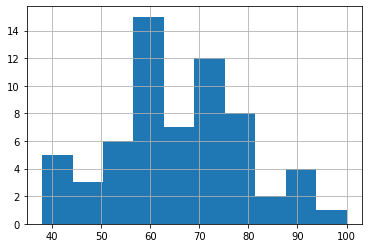

In [21]:
group_a[group_a['race/ethnicity']=='group A']['math score'].hist()

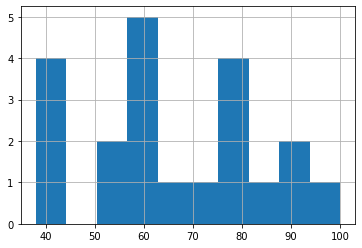

In [22]:
group_a[group_a['test preparation course']=='completed']['math score'].hist()

In [23]:
course_completed['gender'].value_counts()

male      184
female    162
Name: gender, dtype: int64

In [25]:
#10
concat_data=pd.concat([group_a,course_completed])
concat_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
19,female,group A,some high school,free/reduced,none,58,80,68
80,male,group A,some high school,free/reduced,none,72,74,69
98,male,group A,some high school,standard,none,45,48,35
109,male,group A,bachelor's degree,free/reduced,none,47,55,53
128,male,group A,associate's degree,standard,completed,100,97,94
...,...,...,...,...,...,...,...,...
980,male,group E,associate's degree,standard,completed,95,84,92
982,male,group D,associate's degree,free/reduced,completed,84,82,84
986,female,group B,high school,free/reduced,completed,60,81,79
991,male,group B,master's degree,standard,completed,78,76,80


In [32]:
concat_data[concat_data.duplicated()==True].count()


gender                         21
race/ethnicity                 21
parental level of education    21
lunch                          21
test preparation course        21
math score                     21
reading score                  21
writing score                  21
dtype: int64